In [1]:
%load_ext autoreload
%autoreload 2
import dotenv
dotenv.load_dotenv()

False

In [2]:
import glob
import imageio
from matplotlib import pyplot as plt
from utils import make_video, colorify_heatmap, StrokeDetector
import numpy as np
from tqdm.auto import tqdm

In [26]:
import skimage.filters

class threshold_minimum:
    def __call__(self, folder, depth):
        threshold = skimage.filters.threshold_minimum(depth[10])
        print(threshold)
        return np.clip(depth, 0, threshold)

In [33]:
class Otsu:
    def __call__(self, folder, depth):
        histogram, bins = np.histogram(depth, bins=100)
        histogram[-1] = histogram[0] = 0
        left = bins[np.argmax(histogram)+1]
        histogram, bins = np.histogram(depth, bins=100, range=(0, left))
        print(left)
        threshold = skimage.filters.threshold_otsu(hist=histogram)
        return np.clip(depth, 0, threshold)

  0%|          | 0/3 [00:00<?, ?it/s]

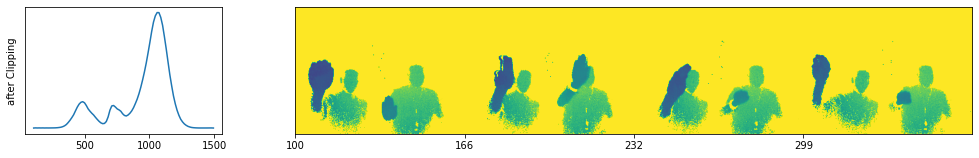

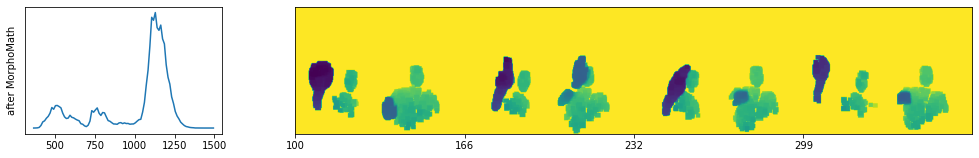

1135.2


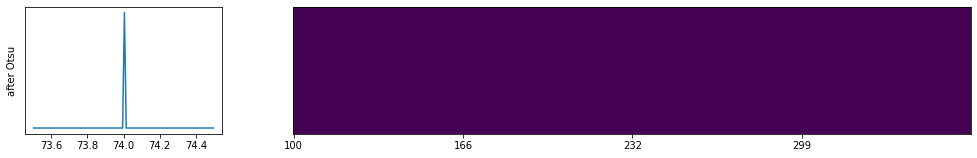

  0%|          | 0/3 [00:00<?, ?it/s]

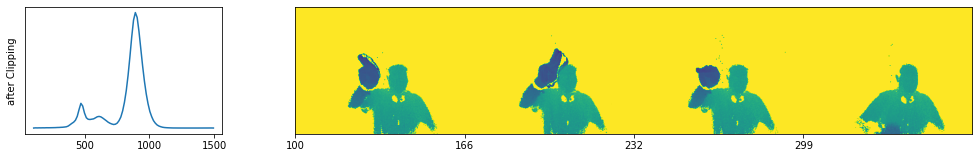

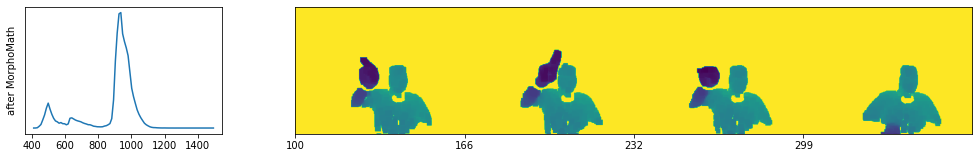

942.06


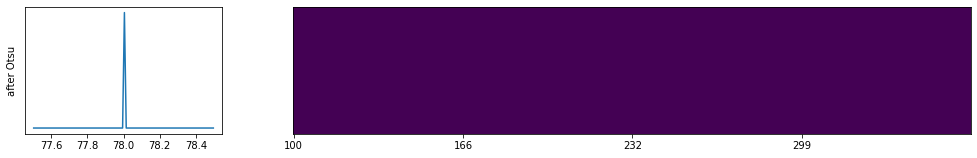

  0%|          | 0/3 [00:00<?, ?it/s]

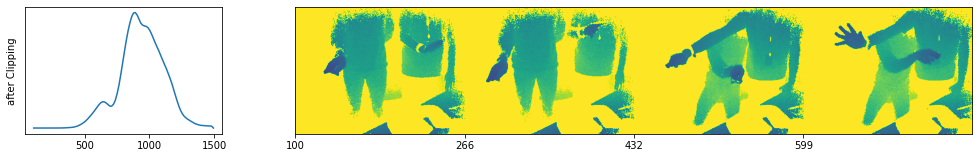

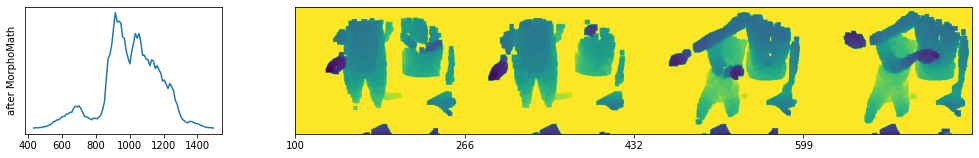

921.12


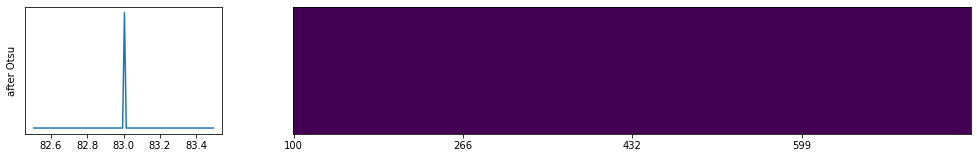

In [34]:
from operations import *
from stroke_detector import StrokeDetector

detector1 = StrokeDetector([
    OtsuThresholding(debug=True, range=(100, 1000)),
    MorphoMath("area_closing", area_threshold=64),
    Normalize(),
])

detector2 = StrokeDetector([
    Clipping(range=(100, 1500)),
    MorphoMath("closing", footprint=np.ones((8, 8))),
    Otsu(),
    #OtsuThresholding(debug=True, range=(100, 1200)),
    #Normalize(),
    #Opposite(),
    #ContrastStretching(),
    #Quantize(q=6, cmap_debug='viridis'),
])

for folder in [
    "dataset/ds325/gestures_two_hands",
    "dataset/ds325/fast_circles",
    "dataset/ds325/gestures_two_hands_swap",
    #"dataset/ds536/circle_ccw",
]:
    for detector in [detector2]:#, detector2]:
        output = detector(folder=folder)

  0%|          | 0/17 [00:00<?, ?it/s]

dataset/ds325/fast_circles


  0%|          | 0/3 [00:00<?, ?it/s]

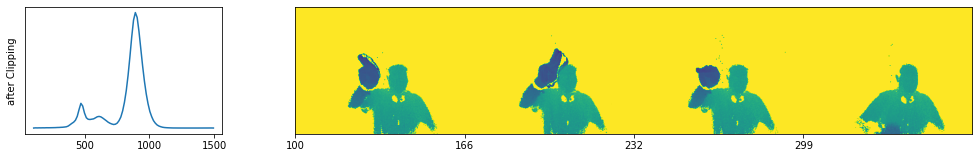

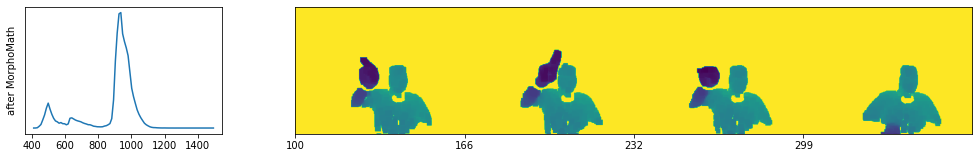

942.06


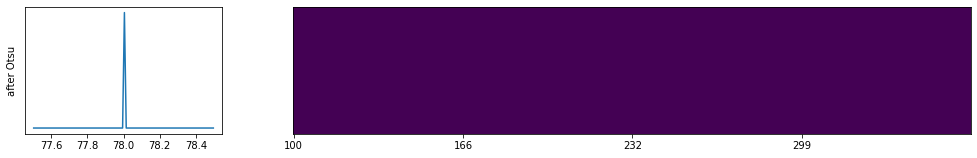

dataset/ds325/gestures_two_hands


  0%|          | 0/3 [00:00<?, ?it/s]

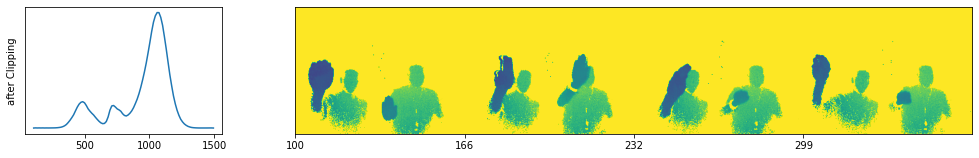

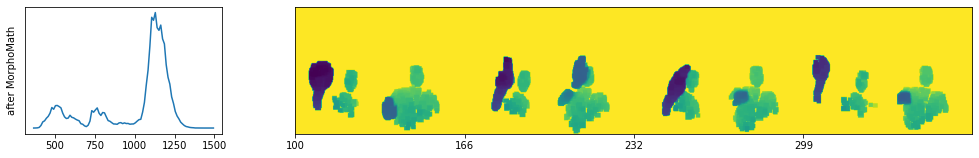

1135.2


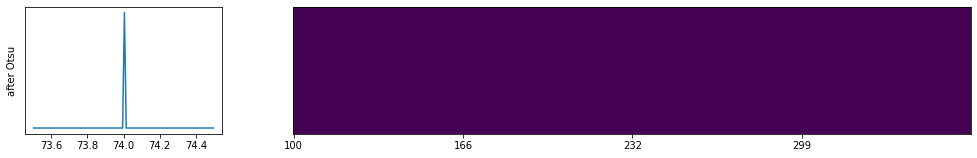

dataset/ds325/gestures_two_hands_swap


  0%|          | 0/3 [00:00<?, ?it/s]

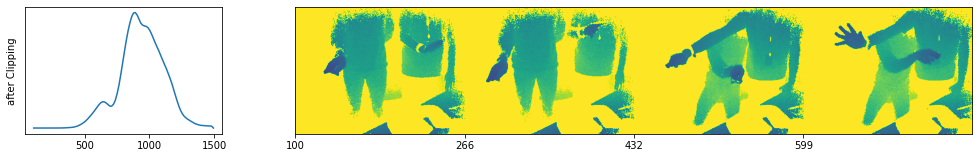

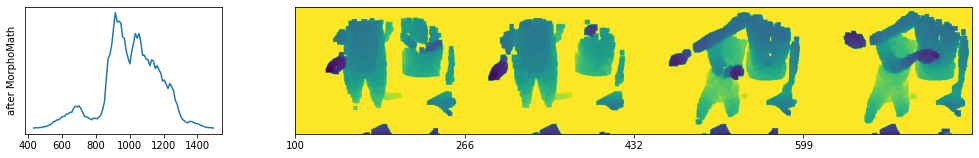

921.12


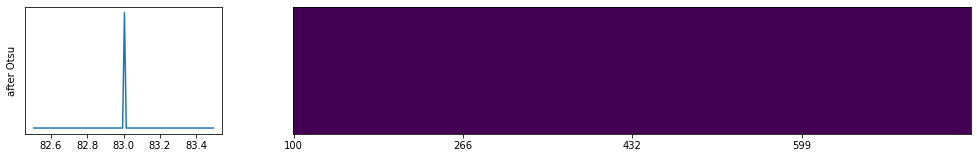

dataset/ds325/sequence_closed_hand


  0%|          | 0/3 [00:00<?, ?it/s]

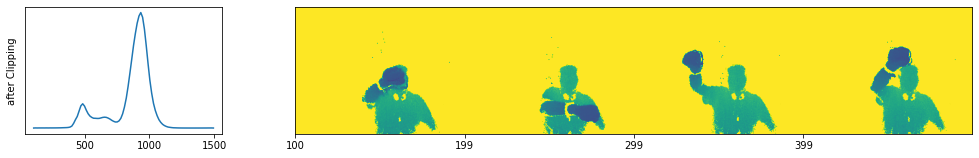

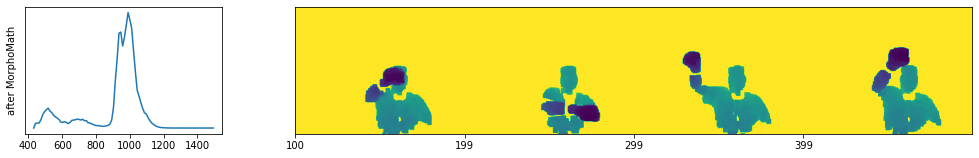

995.22


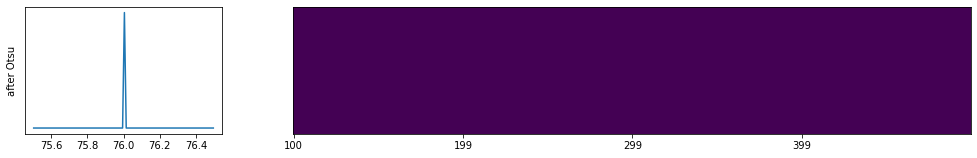

dataset/ds325/sequence_open_hand


  0%|          | 0/3 [00:00<?, ?it/s]

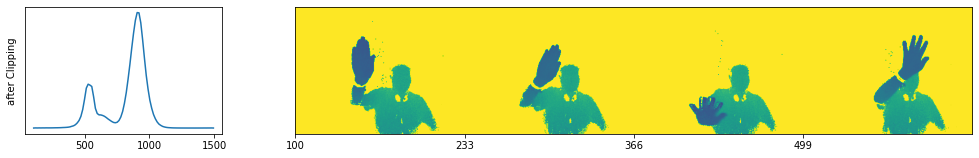

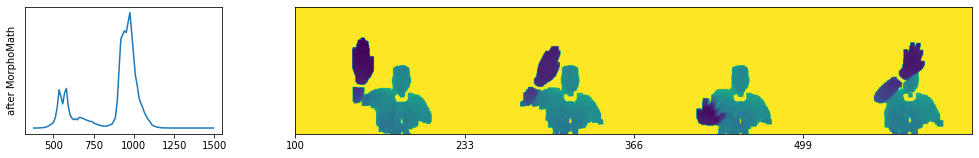

981.12


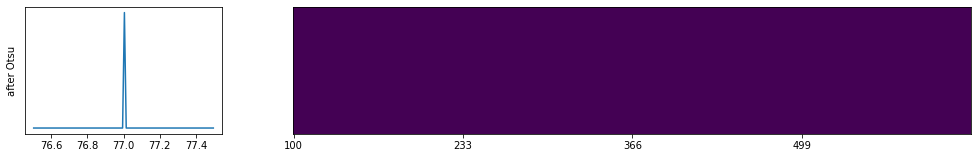

dataset/ds325/sequence_small_shapes


  0%|          | 0/3 [00:00<?, ?it/s]

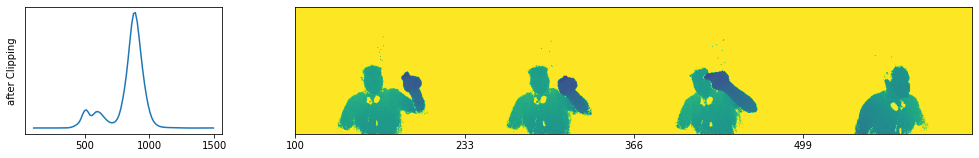

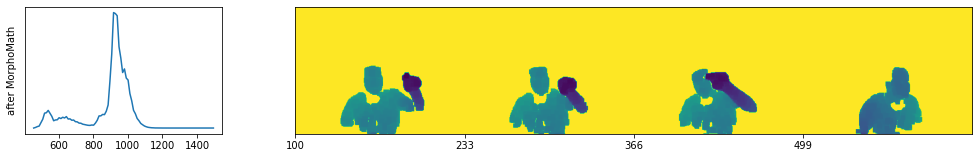

922.5


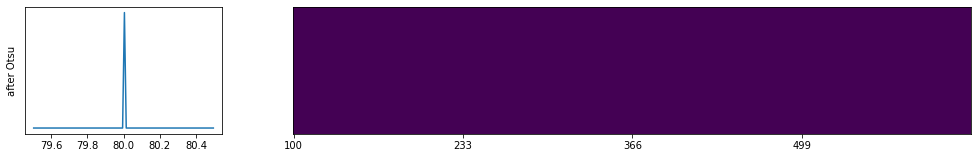

dataset/ds536/circle_ccw


  0%|          | 0/3 [00:00<?, ?it/s]

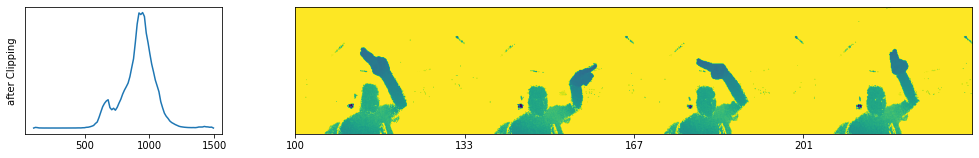

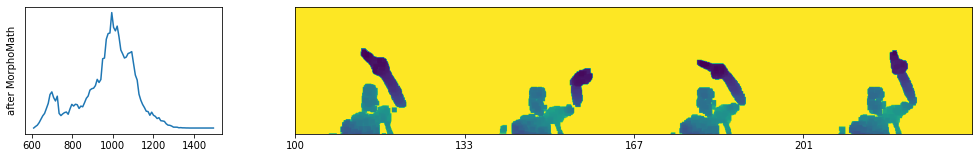

998.8


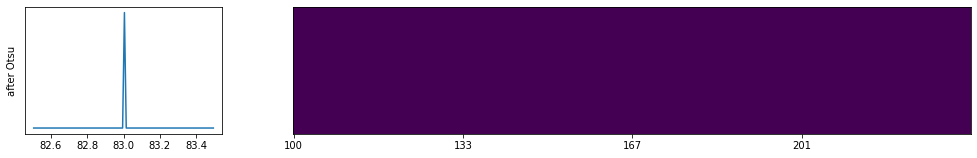

dataset/ds536/circle_ccw_far


  0%|          | 0/3 [00:00<?, ?it/s]

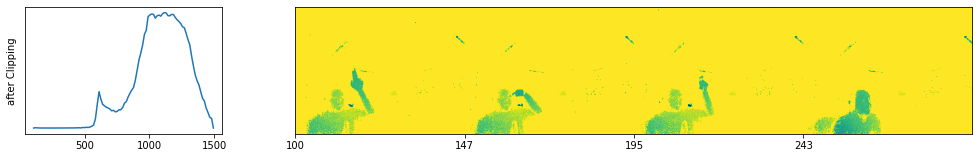

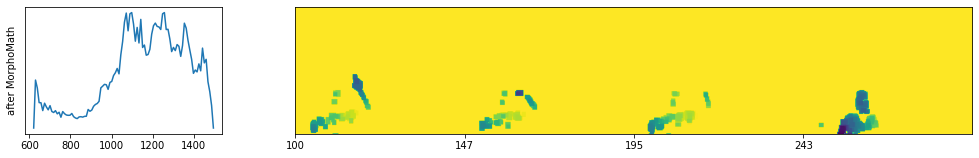

1102.65


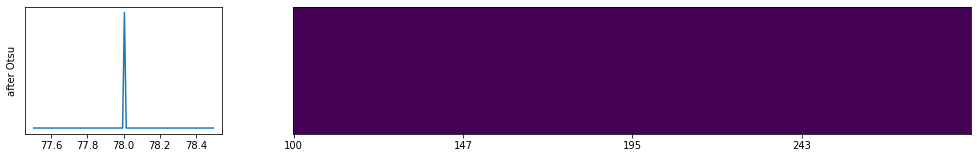

dataset/ds536/circle_ccw_hand


  0%|          | 0/3 [00:00<?, ?it/s]

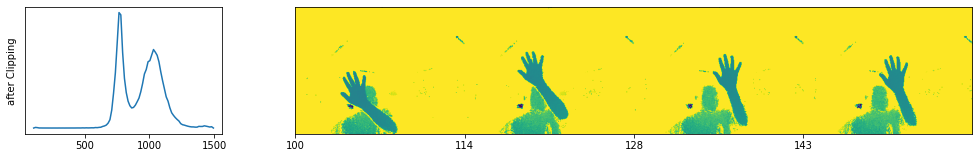

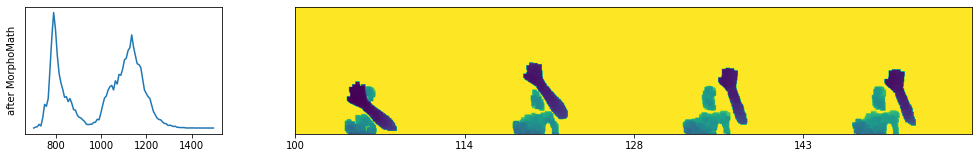

795.12


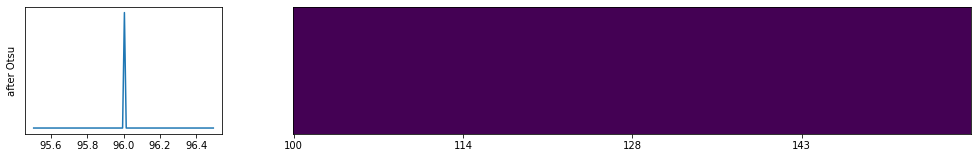

dataset/ds536/circle_sequence


  0%|          | 0/3 [00:00<?, ?it/s]

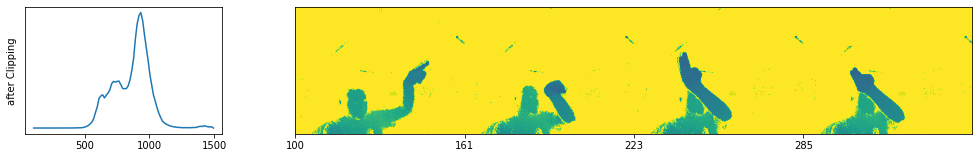

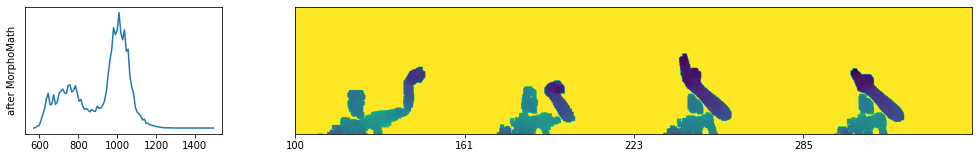

1014.3199999999999


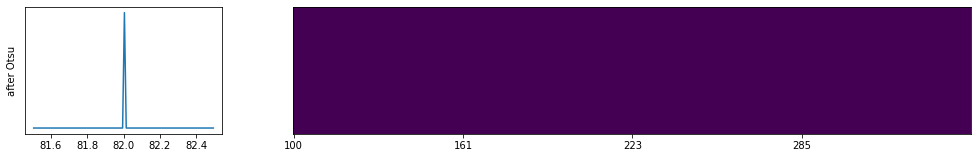

dataset/ds536/multiple_shapes_1


  0%|          | 0/3 [00:00<?, ?it/s]

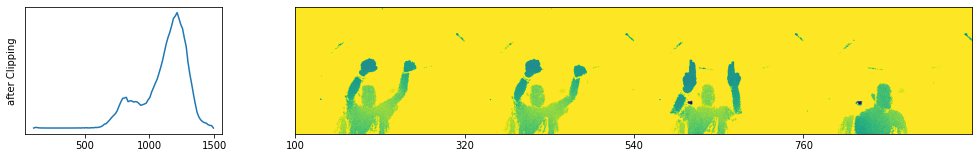

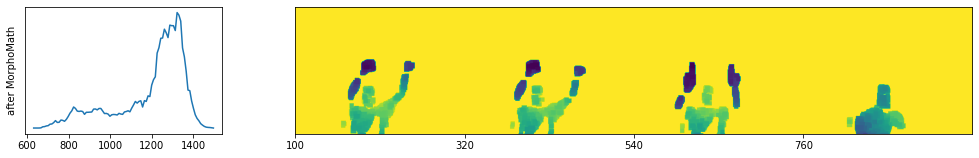

1325.6


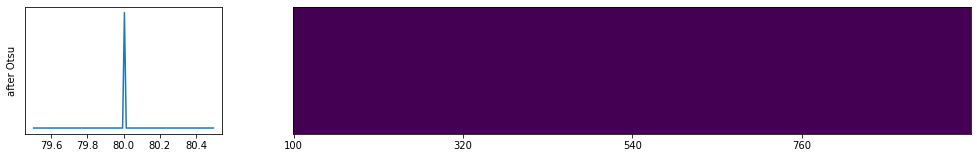

dataset/ds536/rectangle_ccw


  0%|          | 0/3 [00:00<?, ?it/s]

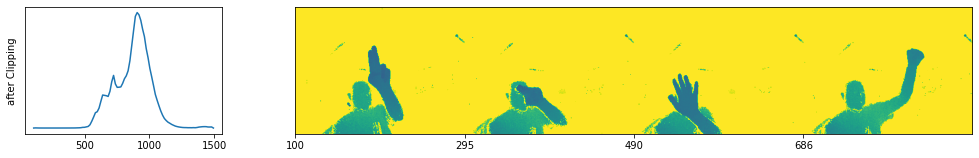

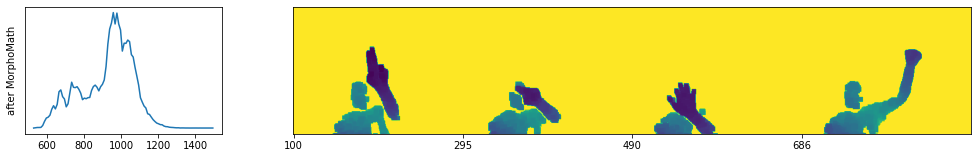

962.0999999999999


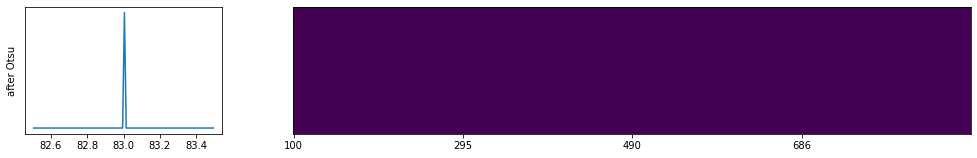

dataset/ds536/rectangle_cw


  0%|          | 0/3 [00:00<?, ?it/s]

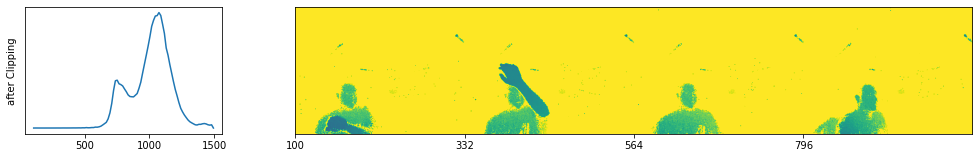

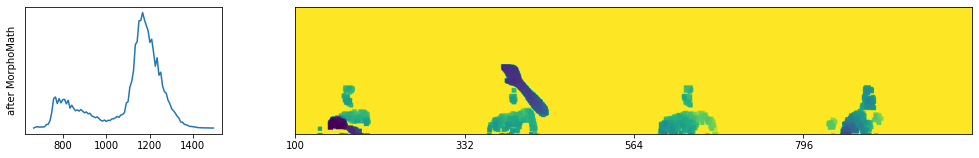

1172.01


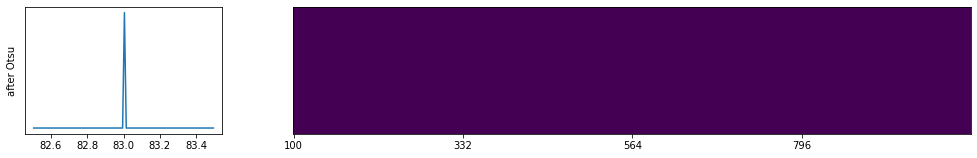

dataset/ds536/star


  0%|          | 0/3 [00:00<?, ?it/s]

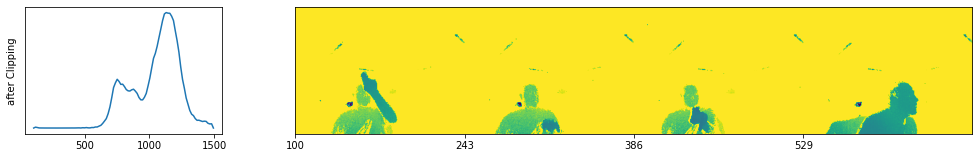

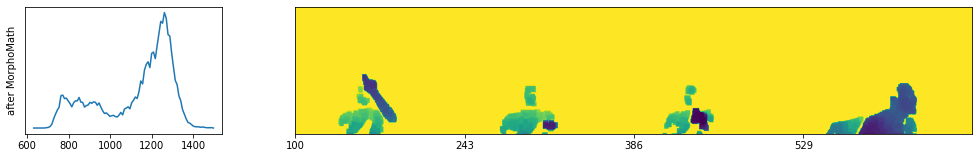

1264.56


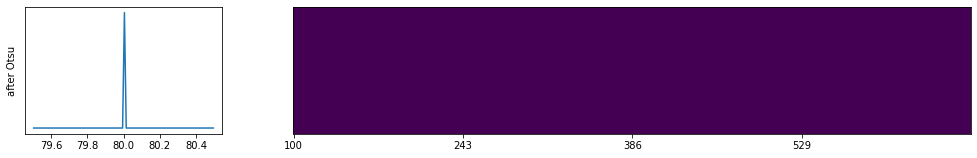

dataset/ds536/zigzag


  0%|          | 0/3 [00:00<?, ?it/s]

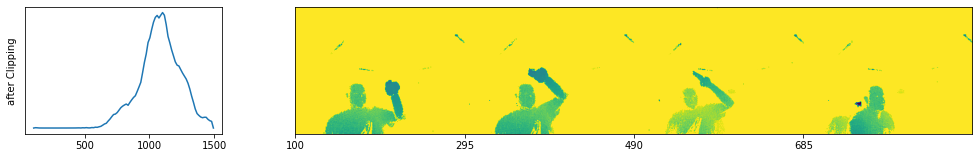

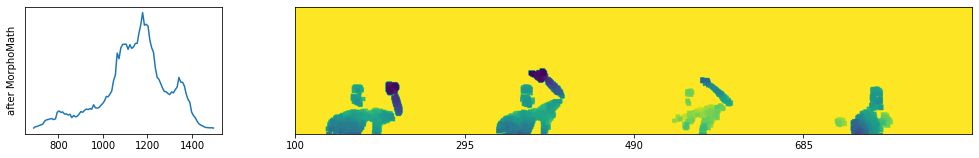

1182.15


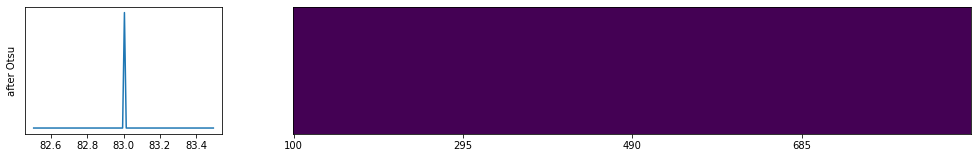

In [35]:
for folder in filter(lambda x: '.txt' not in x, tqdm(sorted(glob.glob("dataset/*/*")))):
    print(folder)
    detector(folder)

In [ ]:
for folder in filter(lambda x: '.txt' not in x, tqdm(sorted(glob.glob("dataset/*/*")))):
    print(folder)
    detector(folder)

In [ ]:
from d1_unistroke_recognizer.dollar import Dollar

In [ ]:
import glob
import imageio
from matplotlib import pyplot as plt


for d in tqdm(glob.glob("dataset/ds325/*")):
    vm = VideoMaker(f"325_{d[14:]}.mp4")
    l = len(glob.glob(f"{d}/*"))//2
    for i in tqdm(range(l)):
        filename = f"{d}/{i:06d}_{{}}.tiff"
        img = np.hstack([f(imageio.imread(filename.format(name))).astype(np.uint8)
                   for name, f in zip(['depth', 'confidence'], [lambda x: x/256, lambda x: x*255/np.max(x)])])
        vm(img)

    del vm